# Statistical Hypothesis tests
Includes
- normality tests
- dependance of variables or correlation tests 
- hypothesis tests ( parametric and non parametric)

when it comes to assumptions such as the expected distribution of data or sample size, the results of a given test are likely to degrade gracefully rather than become immediately unusable if an assumption is violated.

Generally, data samples need to be representative of the domain and large enough to expose their distribution to analysis.

In some cases, the data can be corrected to meet the assumptions, such as correcting a nearly normal distribution to be normal by removing outliers, or using a correction to the degrees of freedom in a statistical test when samples have differing variance, to name two examples.

Finally, there may be multiple tests for a given concern, e.g. normality. We cannot get crisp answers to questions with statistics; instead, we get probabilistic answers. As such, we can arrive at different answers to the same question by considering the question in different ways. Hence the need for multiple different tests for some questions we may have about data.

# Normality Tests

## Shapiro-Wilk Test

- H0 - sample has a guassian dist
- Ha- not a guassian dist

In [1]:
from scipy.stats import shapiro

In [2]:
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]

In [3]:
stat,p=shapiro(data)

In [4]:
# stat is the test statistic
# p is p-value
stat,p

(0.8951009511947632, 0.19340917468070984)

In [5]:
if(p>0.05):
    print('H0')
else:
    print('Ha')

H0


# D'Agostino's K^2 Test

- hypothesis are sample for all tests of normality

In [6]:
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat,p=normaltest(data)
if(p>0.05):
    print('H0')
else:
    print('Ha')

H0


c:\users\sudhe\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


# Anderson-Darling Test

In [7]:
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result=anderson(data)
result

AndersonResult(statistic=0.4239737141854807, critical_values=array([0.501, 0.57 , 0.684, 0.798, 0.95 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [8]:
result.statistic

0.4239737141854807

In [9]:
for i in range(len(result.critical_values)):
    sl,cv=result.significance_level[i],result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))    
    

Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


### A large fraction of the field of statistics is concerned with data that assumes that it was drawn from a Gaussian distribution.

### If methods are used that assume a Gaussian distribution, and your data was drawn from a different distribution, the findings may be misleading or plain wrong.

### There are a number of techniques that you can check if your data sample is Gaussian or sufficiently Gaussian-like to use the standard techniques, or sufficiently non-Gaussian to instead use non-parametric statistical methods.

### This is a key decision point when it comes to choosing statistical methods for your data sample. We can summarize this decision as follows

# Use parametric statistical methods if the data is guassian or else use non-parametric methods.. so normality testing is required for Hypothesis testing

# There are three main areas where you may need to make this evaluation of a data sample in a machine learning project; they are:

- Input data to the model in the case of fitting models.
- Model evaluation results in the case of model selection.
- Residual errors from model predictions in the case of regression.

# wo classes of techniques for checking whether a sample of data is Gaussian:

- Graphical Methods. These are methods for plotting the data and qualitatively evaluating whether the data looks Gaussian.
- Statistical Tests. These are methods that calculate statistics on the data and quantify how likely it is that the data was drawn from a Gaussian distribution.

In [10]:
from numpy.random import seed
from numpy.random import randn
import numpy as np

seed(1)
data=5*randn(100)+50
data.shape,data.mean(),data.std()

((100,), 50.30291426037849, 4.4257810691579245)

## Graphical methods

### 1 histogram plot

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 3.,  1.,  6., 17., 19., 20., 14., 12.,  5.,  3.]),
 array([38.49230652, 40.73586357, 42.97942062, 45.22297767, 47.46653472,
        49.71009177, 51.95364883, 54.19720588, 56.44076293, 58.68431998,
        60.92787703]),
 <a list of 10 Patch objects>)

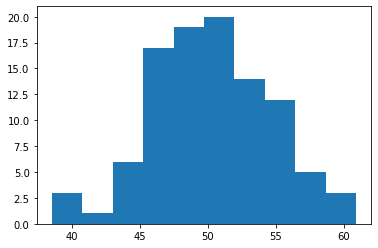

In [12]:
plt.hist(data)

### 2 Quantile-Quantile plot

This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. The idealized samples are divided into groups (e.g. 5), called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.

In [13]:
from statsmodels.graphics.gofplots import qqplot

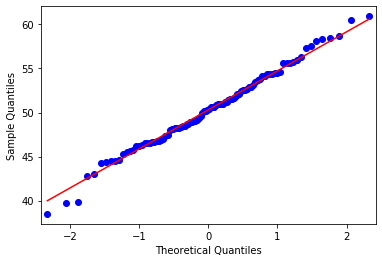

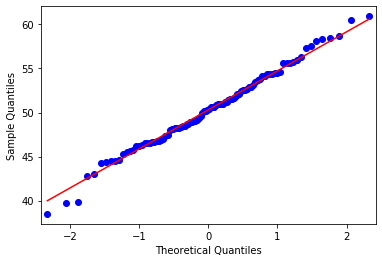

In [14]:
qqplot(data,line='s')

# no much deviations so it can be considered as normal plot

# Statistical Normality Tests

## Before you can apply the statistical tests, you must know how to interpret the results.

#### Each test will return at least two things:

- Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.
- p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.

we studied these in hypothesis testing...

## 1 shapiro-wilk test
The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In [15]:
stat,p=shapiro(data)

In [16]:
stat,p

(0.99200439453125, 0.82154381275177)

## 2 D'Agostino's K^2 Test

The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

In [17]:
normaltest(data)

NormaltestResult(statistic=0.10202388832581942, pvalue=0.950267320316961)

## 3 Anderson-Darling Test

Anderson-Darling Test is a statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples, named for Theodore Anderson and Donald Darling.

It can be used to check whether a data sample is normal. The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.

In [18]:
result=anderson(data)
for i in range(len(result.critical_values)):
    sl,cv=result.significance_level[i],result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))    


Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


### Hard Fail
Your data may not be normal for lots of different reasons. Each test looks at the question of whether a sample was drawn from a Gaussian distribution from a slightly different perspective.

A failure of one normality test means that your data is not normal. As simple as that.

You can either investigate why your data is not normal and perhaps use data preparation techniques to make the data more normal.

Or you can start looking into the use of nonparametric statistical methods instead of the parametric methods.

### Soft Fail
If some of the methods suggest that the sample is Gaussian and some not, then perhaps take this as an indication that your data is Gaussian-like.

In many situations, you can treat your data as though it is Gaussian and proceed with your chosen parametric statistical methods

# Correlation Tests
- to find the dependancy between 2 variables
- H0- dependent (p<alpha)
- H1- independent (p>alpha)

## 1 Pearson’s Correlation Coefficient
### Tests whether two samples have a linear relationship.

#### Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

In [19]:
from scipy.stats import pearsonr

In [20]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]


In [21]:
stat,p=pearsonr(data1,data2)

In [22]:
stat,p

(0.6879696368388862, 0.027872969514496207)

In [23]:
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

Probably dependent


### Spearman's Rank Correlation
#### Tests whether two samples have a monotonic relationship.

##### Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.

In [24]:
from scipy.stats import spearmanr
stat,p=spearmanr(data1,data2)

In [25]:
stat,p

(0.8545454545454544, 0.0016368033159867143)

In [26]:
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

Probably dependent


### 3 Kendall’s Rank Correlation
#### Tests whether two samples have a monotonic relationship.

##### Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.

In [27]:
from scipy.stats import kendalltau
stat,p=kendalltau(data1,data2)
if p > 0.05:
	print('Probably independent - reject H0')
else:
	print('Probably dependent  - failed to H0')

Probably dependent  - failed to H0


In [28]:
import pandas as pd

In [29]:
df=pd.DataFrame([(i,j) for i,j in zip(data1,data2)],columns=['data1','data2'])

In [30]:
df.head()

,data1,data2
0,0.873,0.353
1,2.817,3.517
2,0.121,0.125
3,-0.945,-7.545
4,-0.055,-0.555


In [31]:
df.corr()

,data1,data2
data1,1.00000,0.68797
data2,0.68797,1.00000


In [32]:
df.corr(method='pearson') # by default

,data1,data2
data1,1.00000,0.68797
data2,0.68797,1.00000


In [33]:
df.corr(method='spearman')

,data1,data2
data1,1.000000,0.854545
data2,0.854545,1.000000


In [34]:
df.corr(method='kendall')

,data1,data2
data1,1.000000,0.733333
data2,0.733333,1.000000


# so the upper scipy.stats are used to reject or accept hypothesis that they are dependent or not.. where as below these will just give the correlation value belongs to [-1,1] and it tells the similarity

### 4 Chi-Squared Test
#### Tests whether two categorical variables are related or independent.

##### Assumptions

- Observations used in the calculation of the contingency table are independent.
- 25 or more examples in each cell of the contingency table.
- all values of table are positive

In [35]:
from scipy.stats import chi2_contingency
stat,p,dof,expected=chi2_contingency( [[10, 20, 30],[6,  9,  17]])
# the list of lists we passed as parameters is a contingency table

# contigency table we sent can be formed for any set of categorical variables.. chi-squared test is only for the dependancy check of categorical variables...

# In python pd.crosstab gives the contingency table

# send this contingency to chi2_contingency() and take the p-value and then accept or reject hypothesis

In [36]:
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

Probably independent


In [37]:
p

0.873028283380073

# Hypothesis Testing - parametric
## two sample t-test

In [49]:
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution -reject H0')
else:
	print('Probably different distributions- failed to reject H0')

stat=-0.326, p=0.748
Probably the same distribution -reject H0


## one sample t-test

In [47]:
from scipy.stats import ttest_1samp
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = ttest_1samp(data1, 5)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution -reject H0')
else:
	print('Probably different distributions- failed to reject H0')

stat=-11.558, p=0.000
Probably different distributions- failed to reject H0


## paired t-test

In [51]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution -reject H0')
else:
	print('Probably different distributions-failed to reject H0')

stat=-0.334, p=0.746
Probably the same distribution -reject H0


## ANOVA

In [52]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution - reject H0')
else:
	print('Probably different distributions- failed to reject H0')

stat=0.096, p=0.908
Probably the same distribution - reject H0


# Hypothesis Testing - non-parametric